# Lab1 Titanic passangers' data analysis
---

By doing this lab you should get acquinted with API of basic machine learning python libraries such as:

* scikit-learn
* numpy
* pandas
* matplotlib

This task will give ?? points

## TASK:

[Kaggle](https://www.kaggle.com/) is a data analysis competition platform. Even if you don't interested in that kind of competitions (but there is assumption that you should be interested), there are a lot of examples of rather good data analysis, called [kernels](https://www.kaggle.com/kernels) in kaggle terminology, that you can consult during this course.

1. You should register on [Kaggle](https://www.kaggle.com/) to be able to download datasets.
2. Download dataset `train.csv` from [Titanic: Machine Learning from Disaster](http://www.kaggle.com/c/titanic-gettingStarted/data). You will find dataset description there as well.
3. Every research or analysis are meaningless without right questions, hypothesises? To warm up you need to find meaningfull answers for the next questions:
    - How many passengers was travelling by first class?
    - What is the most popular female name on board?
    - How does ticket cost varie?
    - What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?
    - Are there any dependencies between class and ticket number?
    - What part of passengers was able to survive?
    - Are there any correlation between the number of brothers/sisters and the number of parents/kids ?
   
4. Try to find some correlations or dependencies manually and support/prove them with graphs or statistics. Find some exact rules describing some subset of survived class. What can you say about interpretation complexity of there rules? 
5. Check the following assumptions:
    - Females survived more frequently than mens
    - Passangers with more expensive tickets survived with higher probability
    
## Report

All reports should be delivered in the format of IPython (Jupyter) Notebooks (`.ipynb` files). 



## TOOLS AND LINKS

  * [Collection of interesting notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

###  Python libraries

  * [NumPy](http://www.numpy.org/)
    - [graph library Matlab](http://wiki.scipy.org/NumPy_for_Matlab_Users)
  * [Pandas](http://pandas.pydata.org/)
    - [how to work with datasets using pandas](http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)
  * [Matplotlib](http://matplotlib.org/index.html)
    - [pyplot](http://matplotlib.org/api/pyplot_api.html) — matlab graph utility emulation in python
    - [example gallery](http://matplotlib.org/gallery.html)
  * [SciPy](http://scipy.org/)





Answers:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from pandas import read_csv
from patsy import dmatrices
from sklearn import datasets, svm



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [2]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
    
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
    

In [3]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


3.1 How many passengers was travelling by first class?

In [4]:
sum(df.Pclass == 1)

216

3.2 What is the most popular female name on board?

In [5]:
data2 = df[df.Sex == 'female']['Name']


C = []
for i in data2:
  if '(' in i:
    if ')' in i.split('(')[1].split(' ')[0]:
      C.append(i.split('(')[1].split(' ')[0].split(')')[0])
    else:
      C.append(i.split('(')[1].split(' ')[0])

  else:
    C.append(i.split('. ')[1].split(' ')[0])

Names=pd.DataFrame(C, columns=["Name"])  
Names.Name.value_counts()

Anna         15
Mary         14
Elizabeth    11
Margaret     10
Alice         6
Bertha        5
Helen         5
Maria         4
Catherine     4
Ada           4
Marie         4
Ellen         4
Augusta       4
Annie         4
Marion        4
Emily         4
Florence      4
Ida           3
Hanora        3
Lillian       3
Madeleine     3
Elisabeth     3
Edith         3
Jane          3
Katherine     3
"Mrs          3
Amelia        3
Mabel         2
Ethel         2
Clara         2
             ..
Eliina        1
Margareth     1
Cordelia      1
Aurora        1
Hilda         1
Jamila        1
Ingeborg      1
Laura         1
Marian        1
Saiide        1
Latifa        1
Eleanor       1
Elna          1
Sigrid        1
Pieta         1
Lutie         1
Hildur        1
Grace         1
Bessie        1
Kornelia      1
Helena        1
Elina         1
Gerda         1
Juliet        1
Ellis         1
Juliette      1
Elise         1
Mantoura      1
Asuncion      1
Vera          1
Name: Name, dtype: int64

It's easy to see that the most popular female name on board is Anna.

3.3 How does ticket cost variate?

In [6]:
fare1=df[df.Pclass == 1]['Fare']
print ("Ticket cost for First class variate between: ", min(fare1), '\t', max(fare1), '\n')
fare2=df[df.Pclass == 2]['Fare']
print ("Ticket cost for Second class variate between: ", min(fare2), '\t', max(fare2), '\n')
fare3=df[df.Pclass == 3]['Fare']
print ("Ticket cost for Third class variate between: ", min(fare3), '\t', max(fare3), '\n')


Ticket cost for First class variate between:  0.0 	 512.3292 

Ticket cost for Second class variate between:  0.0 	 73.5 

Ticket cost for Third class variate between:  0.0 	 69.55 



3.4 What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?

In [7]:
df['Title'] = df['Name'].apply(lambda x : x.split(',')[1]).apply(lambda x: x.split()[0])
pd.crosstab(df['Title'], df['Pclass'])

Pclass,1,2,3
Title,,,
Capt.,1,0,0
Col.,2,0,0
Don.,1,0,0
Dr.,5,2,0
Jonkheer.,1,0,0
Lady.,1,0,0
Major.,2,0,0
Master.,3,9,28
Miss.,46,34,102


3.5 What part of passengers was able to survive?

In [8]:
part_survive = sum(df.Survived==1)/len(df)
print ("%.2f" % part_survive, "of passengers was able to survive")

0.38 of passengers was able to survive


3.6 Are there any correlation between the number of brothers/sisters and the number of parents/kids ?

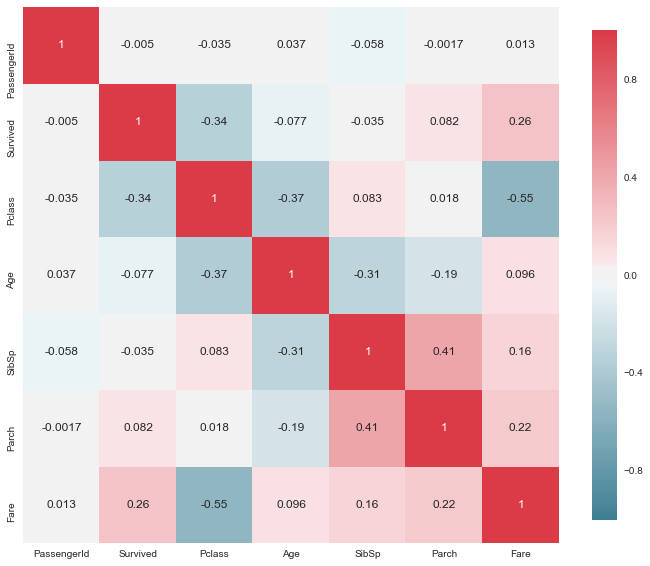

In [9]:
plot_correlation_map( df )

As you can see in the figure, the correlation is equal 0.41.

4.Some exact rules describing some subset of survived class:

As can be seen from correlation map, there is some correlation between Fare and Survived (0.26).

Ticket cost for died people variate between:  0.0 	 263.0 



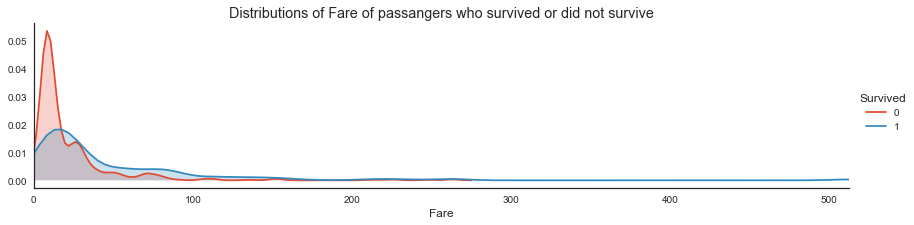

In [12]:
# Plot distributions of Fare of passangers who survived or did not survive
plot_distribution(df , var = 'Fare' , target = 'Survived' )
plt.title("Distributions of Fare of passangers who survived or did not survive")
fare=df[df.Survived == 0]['Fare']
print ("Ticket cost for died people variate between: ", min(fare), '\t', max(fare), '\n')

If build distributions of Fare of Survived, we get some exact rule for survivable:

If you bought the ticket with a price greater than 263 => You survive.

5.1 Females survived more frequently than mens?

(-1, 2)

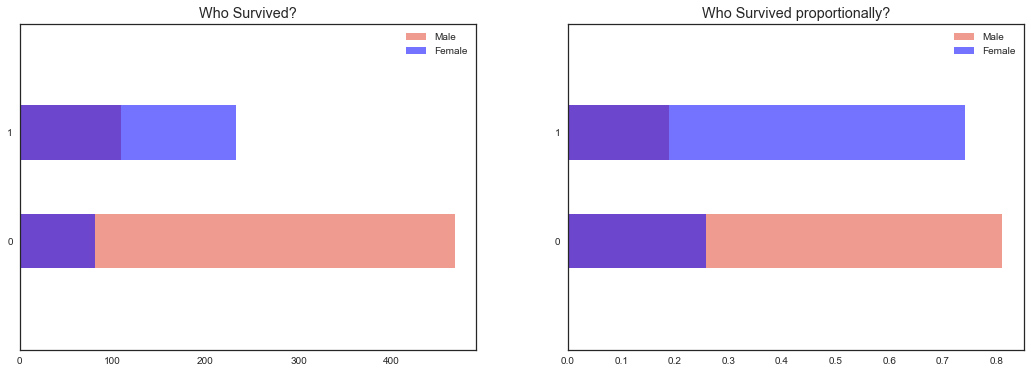

In [10]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='blue',label='Female', alpha=0.55)
plt.title("Who Survived?"); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='blue',label='Female', alpha=0.55)
plt.title("Who Survived proportionally?"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

YES.

5.2 Passangers with more expensive tickets survived with higher probability?

Ticket cost for died people variate between:  0.0 	 263.0 



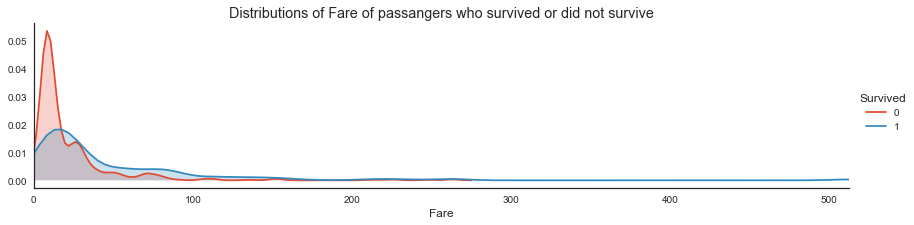

In [11]:
# Plot distributions of Fare of passangers who survived or did not survive
plot_distribution(df , var = 'Fare' , target = 'Survived' )
plt.title("Distributions of Fare of passangers who survived or did not survive")
fare=df[df.Survived == 0]['Fare']
print ("Ticket cost for died people variate between: ", min(fare), '\t', max(fare), '\n')

YES, all of passangers with tickets that costs more than 300 had been survived.